In [79]:
import requests
import re
from bs4 import BeautifulSoup
import json
import gzip
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
body = requests.get('https://www.bbc.com/').text

In [4]:
soup = BeautifulSoup(body, 'html.parser')

In [5]:
a = soup.get_text(' ').replace('\n', '').lower()

In [6]:
b = re.sub(r"[^a-z ]+","", a)

In [7]:
c = ' '.join(b.split())

In [73]:
df = pd.read_json("/dlabdata1/lugeon/websites_1000_5cat_html.json.gz", lines=True)

In [74]:
df = df[df.html.notnull()]
df = df[df.html != '']

In [98]:
html_counts = df.html.value_counts().values[:200]

In [99]:
len([x for x in html_counts if x != 1])

106

In [102]:
html_counts[105]

2

In [106]:
df.html.value_counts().index[104]

'<!DOCTYPE html>\n<html lang="en" class="no-js"><!-- Content Copyright National Park Service --><!-- JavaScript & DHTML Code Copyright &copy; 1998-2015, PaperThin, Inc. All Rights Reserved. --><head> \n<title>Requested Page Not Found (404)</title> \n<meta content="IE=edge" http-equiv="X-UA-Compatible">\n<link rel="stylesheet" href="/common/commonspot/templates/assets/css/commonspotRTE.css" type="text/css">\n<style type="text/css">\n.mw { color:#000000;font-family:Verdana,Arial,Helvetica;font-weight:bold;font-size:xx-small;text-decoration:none; }\na.mw:link\t{color:#000000;font-family:Verdana,Arial,Helvetica;font-weight:bold;font-size:xx-small;text-decoration:none;}\na.mw:visited\t{color:#000000;font-family:Verdana,Arial,Helvetica;font-weight:bold;font-size:xx-small;text-decoration:none;}\na.mw:hover\t{color:#0000FF;font-family:Verdana,Arial,Helvetica;font-weight:bold;font-size:xx-small;text-decoration:none;}\n</style> <script type="text/javascript">\n<!--\nvar gMenuControlID = 0;\nvar 

In [75]:
df['html_len'] = df.apply(lambda x: len(x.html), axis=1)

In [88]:
df.html_len.describe()

count    3.902000e+03
mean     5.269686e+04
std      1.322984e+05
min      3.000000e+00
25%      2.522000e+03
50%      1.503150e+04
75%      4.892325e+04
max      2.965675e+06
Name: html_len, dtype: float64

[]

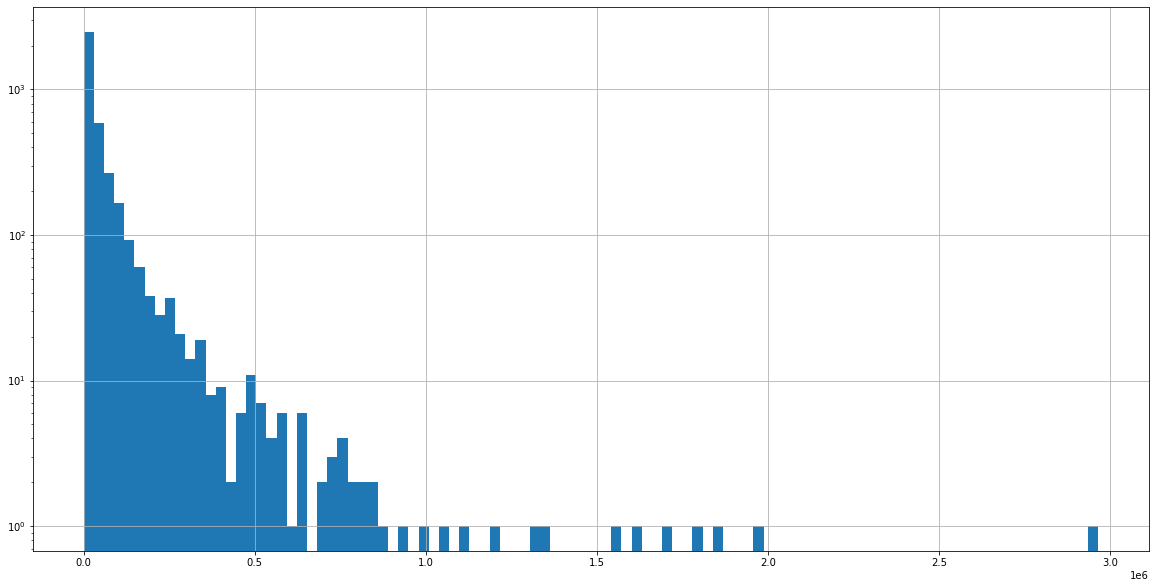

In [90]:
plt.figure(figsize=(20,10))

ax = df.html_len.hist(bins=100)
ax.set_yscale('log')

plt.plot()